### Importing and cleaning data

In [1]:
import pandas as pd

In [2]:
file = "../../datasets/house-votes-84.csv"

In [3]:
data = pd.read_csv(file)

In [4]:
data.head(10)

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
9,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n


In [5]:
add_columns = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
               'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
               'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [8]:
df = pd.read_csv(file, header=0, names=add_columns)

In [9]:
df.head(10)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
5,democrat,n,y,n,y,y,y,n,n,n,n,n,n,?,y,y,y
6,republican,n,y,n,y,y,y,n,n,n,n,n,n,y,y,?,y
7,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
8,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,?,?
9,republican,n,y,n,y,y,n,n,n,n,n,?,?,y,y,n,n


In [10]:
df.iloc[:, 1:] = (df.iloc[:, 1:] == "y").astype(int)

In [11]:
df.head(10)

,party,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
1,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
2,democrat,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
3,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1
4,democrat,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
5,democrat,0,1,0,1,1,1,0,0,0,0,0,0,0,1,1,1
6,republican,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1
7,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
8,democrat,1,1,1,0,0,0,1,1,1,0,0,0,0,0,0,0
9,republican,0,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0


### K Nearest Neighbors Classification Model 

In [12]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [16]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [17]:
# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

### Predictions

In [18]:
y_pred = knn.predict(X)

In [20]:
import numpy as np

In [112]:
# New input
X_new = pd.DataFrame(np.random.randint(low=0, high=2, size=(1, 16)), columns=add_columns[1:])

In [113]:
X_new

,infants,water,budget,physician,salvador,religious,satellite,aid,missile,immigration,synfuels,education,superfund,crime,duty_free_exports,eaa_rsa
0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0


In [114]:
new_prediction = knn.predict(X_new)

In [115]:
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


# The digits recognition dataset

In [127]:
# Import necessary modules
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [128]:
digits = datasets.load_digits()

In [129]:
digits.keys()

dict_keys(['data', 'images', 'DESCR', 'target_names', 'target'])

In [130]:
digits.DESCR

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [131]:
digits.images.shape

(1797, 8, 8)

In [132]:
digits.data.shape

(1797, 64)

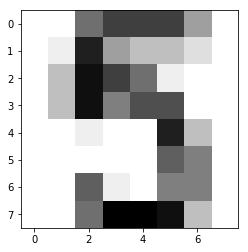

In [133]:
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy

In [134]:
X = digits.data
y = digits.target

In [135]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

In [136]:
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

In [137]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [138]:
knn.score(X_test, y_test)

0.98333333333333328

Incredibly, this out of the box k-NN classifier with 7 neighbors has learned from the training data and predicted the labels of the images in the test set with 98% accuracy, and it did so in less than a second! This is one illustration of how incredibly useful machine learning techniques can be.

### Overfitting and underfitting

In [139]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [140]:
train_accuracy

array([ 0.14023372,  0.14190317,  0.33889816,  0.34056761,  0.53923205,
        0.5409015 ,  0.73956594,  0.93989983])

In [141]:
test_accuracy

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [147]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

In [148]:
train_accuracy

array([ 1.        ,  0.99164927,  0.99373695,  0.99373695,  0.99164927,
        0.98956159,  0.99025748,  0.98956159])

In [144]:
test_accuracy

array([ 0.98611111,  0.98611111,  0.98611111,  0.98333333,  0.98333333,
        0.98055556,  0.98333333,  0.97777778])

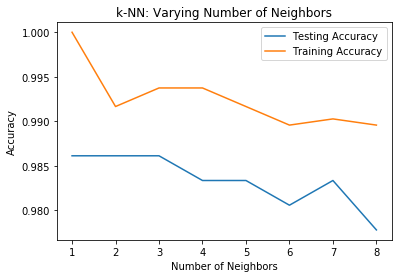

In [149]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

It looks like the test accuracy is highest when using 3 and 5 neighbors. Using 8 neighbors or more seems to result in a simple model that underfits the data. Now that you've grasped the fundamentals of classification.